## <font style="background-color:DodgerBlue" color="White">Test On using smaller N to predict larger N</font>

In [1]:
include("setup.jl")

Model_run (generic function with 1 method)

In [2]:
N = 16
w_r = zeros(5,N)
b_r = zeros(5,N)
times = Float64[]

for i in 1:5
    r = 10.0 ^ (-(i+2))
    if i == 1
        timed_result = @timed Model_run(N,r,rand(N),rand(N))
        w_r[i,:], b_r[i,:] = timed_result[1]
        push!(times, timed_result[2])
    else
        timed_result = @timed Model_run(N,r,w_r[i-1,:],b_r[i-1,:])
        w_r[i,:], b_r[i,:] = timed_result[1]
        push!(times, timed_result[2])
    end
end

Resid = 8.19076295478804e-6

Resid = 9.697864239168293e-6

Resid = 8.945802323057625e-6

Resid = 9.905806667149904e-6

Resid = 9.80798416037449e-6

In [28]:
function CreateX(vec1, target_N)

    vec2 = zeros(target_N)

    for i in 1:length(vec1)
        # Set the current value
        vec2[2i - 1] = vec1[i]
        # Check if not at the end to interpolate
        if i < length(vec1)
            # Linear interpolation and set the next value
            vec2[2i] = (vec1[i] + vec1[i+1]) / 2
        end
    end

    vec2[end] = vec1[end]

    return vec2

end

CreateX (generic function with 1 method)

In [9]:
function CreateVec(vec1, x, target_x)

    vec2 = zeros(length(target_x))

    for i in 1:length(vec1)
        # Set the current value
        vec2[2i - 1] = vec1[i]
        # Check if not at the end to interpolate
        if i < length(vec1)
            # Linear interpolation and set the next value
            vec2[2i] = vec1[i] + ((target_x[2i] - x[i]) * (vec1[i+1] - vec1[i] ) / (x[i+1] - x[i]))
        end
    end

    vec2[end] = vec1[end]

    return vec2
end

CreateVec (generic function with 2 methods)

In [21]:
using Plots


### N = 16 -> N =31

In [34]:
N = 31
w_r_32 = zeros(5,N)
b_r_32 = zeros(5,N)
x1 = LinRange(0, 1, 16)
x2 = CreateX(x1, 31)

times_32 = Float64[]

for i in 1:5
    r = 10.0 ^ (-(i+2))
    init_w = CreateVec(w_r[i,:], x1, x2)
    init_b = CreateVec(b_r[i,:], x1, x2)
    timed_result = @timed Model_run(N,r,init_w,init_b)
    w_r_32[i,:], b_r_32[i,:] = timed_result[1]
    push!(times_32, timed_result[2])

end

Resid = 3.738394034545644e-6

Resid = 7.962908933955976e-6

Resid = 9.842912586639525e-6

Resid = 9.145362022150742e-6

Resid = 9.124463295335546e-6

#### <font color="Green">Time</font>

In [41]:
for i in 1:5
    println("Time needed for ", 10.0 ^ (-(i+2)), " : ",times_32[i], "s")
end

Time needed for 0.001 : 25.4793533s
Time needed for 0.0001 : 24.9611716s
Time needed for 1.0e-5 : 25.24623s
Time needed for 1.0e-6 : 49.9653624s
Time needed for 1.0e-7 : 37.1171373s


#### <font color="Green">Plot of w vs tau </font>

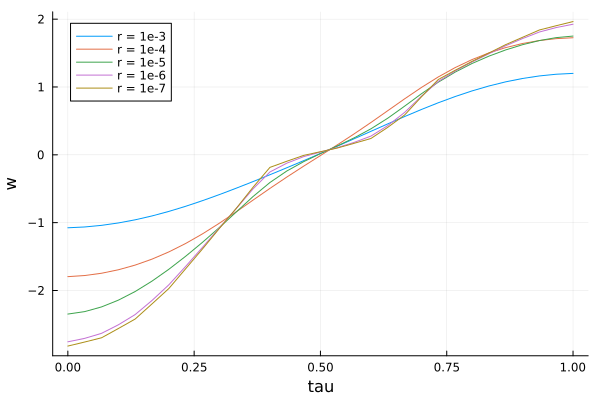

In [43]:
plt = plot() 
for i in 1:5
    plot!(x2,w_r_32[i,:],label="r = 1e-$(i+2)")
end

xlabel!(plt, "tau")
ylabel!(plt, "w")

display(plt)

#### <font color="Green">Plot of b vs tau </font>

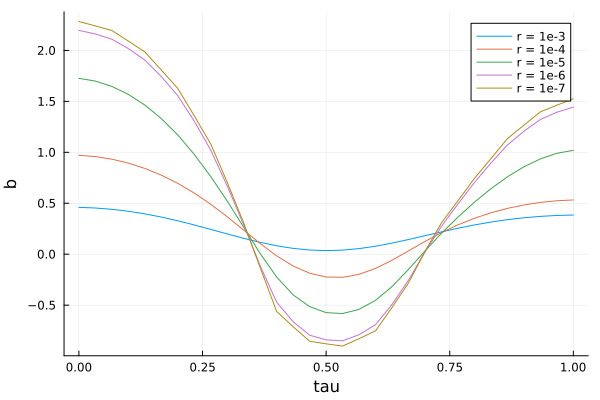

In [44]:
plt = plot() 
for i in 1:5
    plot!(x2,b_r_32[i,:],label="r = 1e-$(i+2)")
end

xlabel!(plt, "tau")
ylabel!(plt, "b")

display(plt)

### N = 31 -> N = 61

In [48]:
N = 61
w_r_61 = zeros(5,N)
b_r_61 = zeros(5,N)
x_61 = CreateX(x2, 61)

times_61 = Float64[]

for i in 1:5
    r = 10.0 ^ (-(i+2))
    init_w = CreateVec(w_r[i,:], x2, x_61)
    init_b = CreateVec(b_r[i,:], x2, x_61)
    timed_result = @timed Model_run(N,r,init_w,init_b)
    w_r_61[i,:], b_r_61[i,:] = timed_result[1]
    push!(times_61, timed_result[2])
end


Resid = 7.183357926097847e-6

Resid = 9.787241197905886e-6

Resid = 9.94986622461237e-6Resid = 9.922560698855281e-6Resid = 9.931218482882431e-6

In [50]:
for i in 1:5
    println("Time needed for", 10.0 ^ (-(i+2)), " : ",times_61[i], "s")
end

Time needed for0.001 : 124.8239921s
Time needed for0.0001 : 942.8866364s
Time needed for1.0e-5 : 1215.697412s
Time needed for1.0e-6 : 1012.0337532s
Time needed for1.0e-7 : 862.3245624s


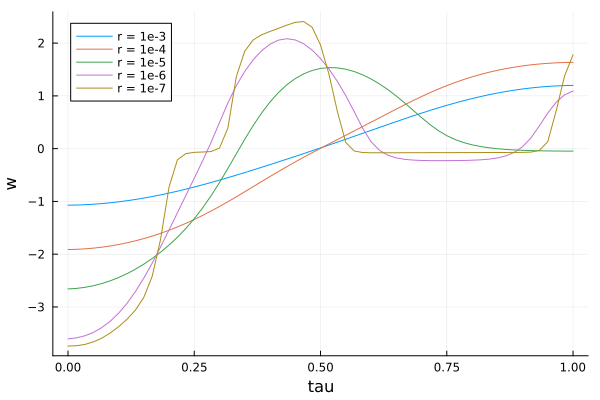

In [52]:
plt = plot() 
for i in 1:5
    plot!(x_61,w_r_61[i,:],label="r = 1e-$(i+2)")
end

xlabel!(plt, "tau")
ylabel!(plt, "w")

display(plt)

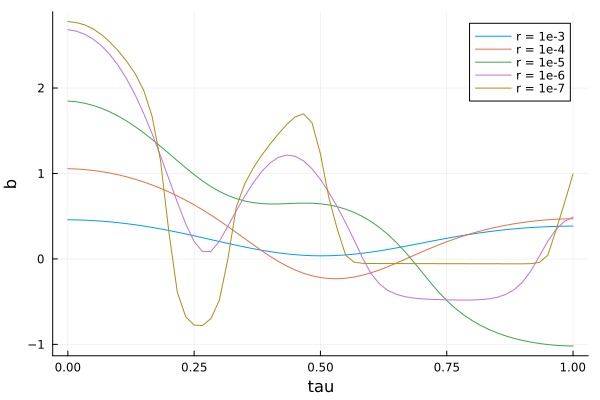

In [53]:
plt = plot() 
for i in 1:5
    plot!(x_61,b_r_61[i,:],label="r = 1e-$(i+2)")
end

xlabel!(plt, "tau")
ylabel!(plt, "b")

display(plt)